## Tensorflow Keras basic

- Demonstrate basic of Keras tensorflow
- Using MNIST fashion
- Categorizing clothing datasets

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


1.15.0
4423680/4422102 [==============================] - 0s 0us/step


## Find out the size of the data

- 60,000 images
- 28X28 pixel

In [0]:
train_images.shape

(60000, 28, 28)

## Find out how many labels in datasets

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Train labels integer

- integer between 0 and 9

In [0]:
len(test_labels)

10000

## Images in test 

- Contain 10000
- size 28x28 pixel

In [0]:
test_images.shape

(10000, 28, 28)

## Preprocess data

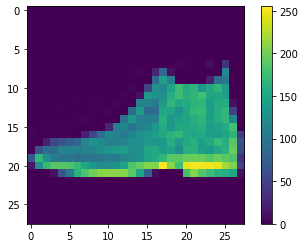

In [6]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

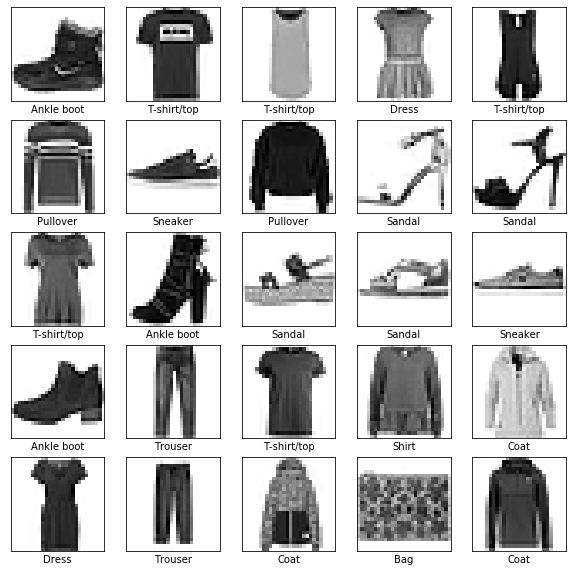

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4968 - acc: 0.8257
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3752 - acc: 0.8642
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3365 - acc: 0.8771
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3109 - acc: 0.8853
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2925 - acc: 0.8922
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2788 - acc: 0.8971
Epoch 7/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2662 - acc: 0.9009
Epoch 8/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2538 - acc: 0.9061
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2459 - acc: 0.9088
Epoch 10/10
60000/60000 [==============================] - 

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\Test accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3496 - acc: 0.8762
\Test accuracy: 0.8762


In [0]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([2.38799238e-08, 1.02776804e-12, 2.27227646e-11, 1.26298165e-11,
       1.85627957e-08, 6.48802787e-04, 1.82866433e-09, 4.60694451e-03,
       9.18279841e-10, 9.94744182e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

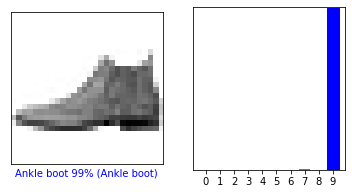

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

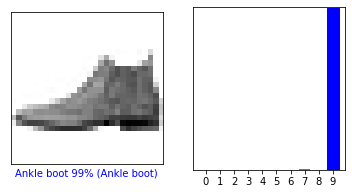

In [27]:
i - 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

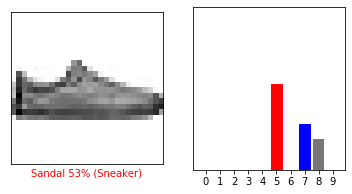

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

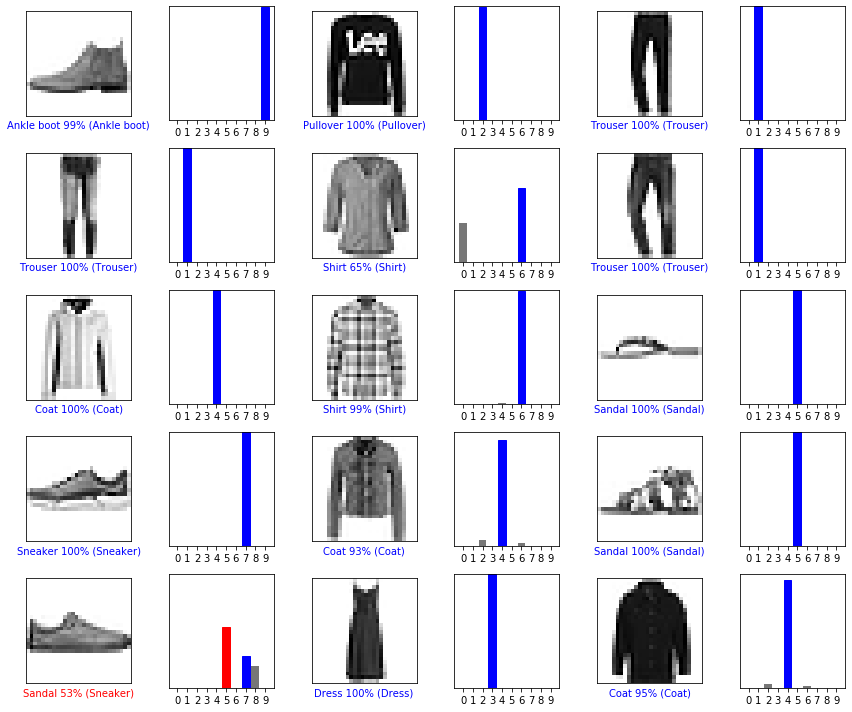

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [30]:
img = test_images[1]

print(img.shape)

(28, 28)


In [31]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.7634767e-05 5.3608129e-14 9.9827886e-01 2.8440656e-11 8.8885380e-04
  4.9558593e-11 7.9474016e-04 3.4427737e-13 1.1477576e-10 1.8714822e-13]]


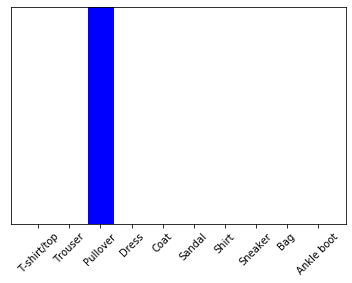

In [40]:
plot_value_array(1, predictions_single[0], test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45)

In [41]:
np.argmax(predictions_single[0])

2